In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from deepcell.utils.tracking_utils import trks_stats, save_trks

import masks
import gif
import raw
import lineage

/opt/conda/lib/python3.7/site-packages/tensorflow-2.5.0-py3.7-linux-x86_64.egg/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [2]:
#f_meta = h5py.File('../22956823/22956823_metadata.hdf5')
#f_meta.keys()

<KeysViewHDF5 ['fov_wells', 'fov_wells_backup', 'full_data', 'mask', 'mean_intensity', 'provenance_tracking', 'timestamp']>

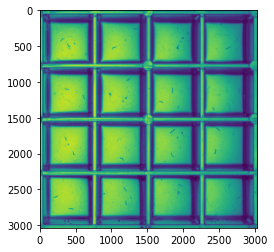

In [3]:
#pic = f_meta['full_data'][0]
#plt.imshow(pic)

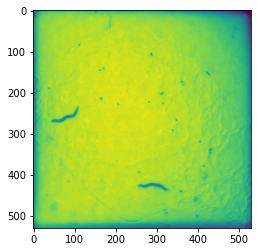

In [24]:
#pic_s = pic[2340:2870, 140:670]
#plt.imshow(pic_s)

In [29]:
#f_meta['fov_wells'][-1]

(2224, 2950, 2252, 2978, b'A9', 1)

In [2]:
# Input file
fN = h5py.File("../22956823/22956823_featuresN.hdf5")

# Define dorsal and ventral coordinates
coordinates = fN['coordinates']
dorsal = coordinates['dorsal_contours']
ventral = coordinates['ventral_contours']

# trajectory_data and timeseries_data
traj = pd.read_hdf("../22956823/22956823_featuresN.hdf5", '/trajectories_data')
timeseries = fN['timeseries_data']

In [3]:
# Get wells - data from timeseries_data, at position [2]
wells = ['A9', 'A10', 'A11', 'A12', 'B9', 'B10', 'B11', 'B12', 'C9', 'C10', 'C11', 'C12', 'D9', 'D10', 'D11', 'D12']
#wells = [each.encode() for each in wells]

well_dict = {}
for each in wells:
    well_dict[each] = []
    
#print('A1'.encode().decode())
for i, each in enumerate(timeseries[:]):  # "i" == index
    well = each[2].decode()
    #well_dict[well] = []
    if well in well_dict.keys():
        well_dict[well].append(i)

In [8]:
# Well positions:

d12 = [180, 710, 140, 670]
d11 = [180, 710, 860, 1390]
d10 = [180, 710, 1590, 2120]
d9 = [180, 710, 2300, 2830]

c12 = [900, 1430, 140, 670]
c11 = [900, 1430, 860, 1390]
c10 = [900, 1430, 1590, 2120]
c9 = [900, 1430, 2300, 2830]

b12 = [1620, 2150, 140, 670]
b11 = [1620, 2150, 860, 1390]
b10 = [1620, 2150, 1590, 2120]
b9 = [1620, 2150, 2300, 2830]

a12 = [2340, 2870, 140, 670]
a11 = [2340, 2870, 860, 1390]
a10 = [2340, 2870, 1590, 2120]
a9 = [2340, 2870, 2300, 2830]

# Masks

In [5]:
well_names = list(well_dict.keys())
well_names

['A9',
 'A10',
 'A11',
 'A12',
 'B9',
 'B10',
 'B11',
 'B12',
 'C9',
 'C10',
 'C11',
 'C12',
 'D9',
 'D10',
 'D11',
 'D12']

In [ ]:
for well in well_names:
    masks.make_well_masks(well=well, traj=traj, dorsal=dorsal, ventral=ventral, well_dict=well_dict, down_sampling=6, file_dir="../22956823/", sequential=True)

# Make raw wells

In [12]:
wells = [d12,d11,d10,d9,c12,c11,c10,c9,b12,b11,b10,b9,a12,a11,a10,a9]
wells = wells[::-1]
wells

[[2340, 2870, 2300, 2830],
 [2340, 2870, 1590, 2120],
 [2340, 2870, 860, 1390],
 [2340, 2870, 140, 670],
 [1620, 2150, 2300, 2830],
 [1620, 2150, 1590, 2120],
 [1620, 2150, 860, 1390],
 [1620, 2150, 140, 670],
 [900, 1430, 2300, 2830],
 [900, 1430, 1590, 2120],
 [900, 1430, 860, 1390],
 [900, 1430, 140, 670],
 [180, 710, 2300, 2830],
 [180, 710, 1590, 2120],
 [180, 710, 860, 1390],
 [180, 710, 140, 670]]

In [13]:
well_names

['A9',
 'A10',
 'A11',
 'A12',
 'B9',
 'B10',
 'B11',
 'B12',
 'C9',
 'C10',
 'C11',
 'C12',
 'D9',
 'D10',
 'D11',
 'D12']

In [18]:
frames

[]

In [22]:
for i, well_name in enumerate(well_names):
    output = "../22956823/raw_wells/%s_raw.npy" % well_name
    raw.get_raw_well(wells[i], well_name=well_name, video_path="../22956823/22956823.mp4", filename=output, frame_start=0, frame_end=9001, down_sampling=1) 

-------- A9 --------
-------- A10 --------
-------- A11 --------
-------- A12 --------
-------- B9 --------
-------- B10 --------
-------- B11 --------
-------- B12 --------
-------- C9 --------
-------- C10 --------
-------- C11 --------
-------- C12 --------
-------- D9 --------
-------- D10 --------
-------- D11 --------
-------- D12 --------


In [23]:
for well_name in well_names:
    raw_video_path = '../22956823/raw_wells/%s_raw.npy' % well_name
    txt = '../22956823/%s_not_empty.txt' % well_name
    raw.make_raw_videos(raw_video_path=raw_video_path, mask_frame_info_fn=txt, well_name=well_name, output_dir='../22956823')

(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 5

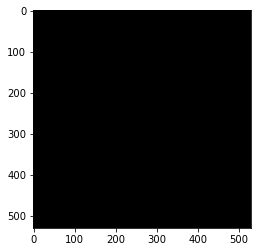

In [38]:
gif.plot_gif(np.load('../22956823/A10_raw_1.npy'), '../22956823/gif/A10_raw_1.gif')
gif.plot_gif(np.load('../22956823/A10_mask_seq_1.npy'), '../22956823/gif/A10_mask_seq_1.gif')

# Make lineage

In [4]:
from lineage import make_lineage

a9_1 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_1.npy", 1)
a9_2 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_2.npy", 2)
a9_3 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_3.npy", 3)
a9_4 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_4.npy", 4)
a9_5 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_5.npy", 5)
a9_6 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_6.npy", 6)
a9_7 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_7.npy", 7)
a9_8 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_8.npy", 8)
a9_9 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_9.npy", 9)
a9_10 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_10.npy", 10)
a9_11 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_11.npy", 11)
a9_12 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_12.npy", 12)
a9_13 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_13.npy", 13)
a9_14 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_14.npy", 14)
a9_15 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_15.npy", 15)
a9_16 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_16.npy", 16)
a9_17 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_17.npy", 17)
a9_18 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_18.npy", 18)
a9_19 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_19.npy", 19)
a9_20 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_20.npy", 20)
a9_21 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_21.npy", 21)
a9_22 = make_lineage(traj, well_dict, 'A9', "22956823", "../22956823/A9_mask_seq_22.npy", 22)
a10_1 = make_lineage(traj, well_dict, 'A10', "22956823", "../22956823/A10_mask_seq_1.npy", 1)
a10_2 = make_lineage(traj, well_dict, 'A10', "22956823", "../22956823/A10_mask_seq_2.npy", 2)
a11_1 = make_lineage(traj, well_dict, 'A11', "22956823", "../22956823/A11_mask_seq_1.npy", 1)
a11_2 = make_lineage(traj, well_dict, 'A11', "22956823", "../22956823/A11_mask_seq_2.npy", 2)
a12_1 = make_lineage(traj, well_dict, 'A12', "22956823", "../22956823/A12_mask_seq_1.npy", 1)
a12_2 = make_lineage(traj, well_dict, 'A12', "22956823", "../22956823/A12_mask_seq_2.npy", 2)

b9_1 = make_lineage(traj, well_dict, 'B9', "22956823", "../22956823/B9_mask_seq_1.npy", 1)
b9_2 = make_lineage(traj, well_dict, 'B9', "22956823", "../22956823/B9_mask_seq_2.npy", 2)
b9_3 = make_lineage(traj, well_dict, 'B9', "22956823", "../22956823/B9_mask_seq_3.npy", 3)
b9_4 = make_lineage(traj, well_dict, 'B9', "22956823", "../22956823/B9_mask_seq_4.npy", 4)
b9_5 = make_lineage(traj, well_dict, 'B9', "22956823", "../22956823/B9_mask_seq_5.npy", 5)
b9_6 = make_lineage(traj, well_dict, 'B9', "22956823", "../22956823/B9_mask_seq_6.npy", 6)
b9_7 = make_lineage(traj, well_dict, 'B9', "22956823", "../22956823/B9_mask_seq_7.npy", 7)
b9_8 = make_lineage(traj, well_dict, 'B9', "22956823", "../22956823/B9_mask_seq_8.npy", 8)
b9_9 = make_lineage(traj, well_dict, 'B9', "22956823", "../22956823/B9_mask_seq_9.npy", 9)
b9_10 = make_lineage(traj, well_dict, 'B9', "22956823", "../22956823/B9_mask_seq_10.npy", 10)
b9_11 = make_lineage(traj, well_dict, 'B9', "22956823", "../22956823/B9_mask_seq_11.npy", 11)
b9_12 = make_lineage(traj, well_dict, 'B9', "22956823", "../22956823/B9_mask_seq_11.npy", 12)
b10_1 = make_lineage(traj, well_dict, 'B10', "22956823", "../22956823/B10_mask_seq_1.npy", 1)
b10_2 = make_lineage(traj, well_dict, 'B10', "22956823", "../22956823/B10_mask_seq_2.npy", 2)
b10_3 = make_lineage(traj, well_dict, 'B10', "22956823", "../22956823/B10_mask_seq_3.npy", 3)
b10_4 = make_lineage(traj, well_dict, 'B10', "22956823", "../22956823/B10_mask_seq_4.npy", 4)
b11_1 = make_lineage(traj, well_dict, 'B11', "22956823", "../22956823/B11_mask_seq_1.npy", 1)
b11_2 = make_lineage(traj, well_dict, 'B11', "22956823", "../22956823/B11_mask_seq_2.npy", 2)
b11_3 = make_lineage(traj, well_dict, 'B11', "22956823", "../22956823/B11_mask_seq_3.npy", 3)
b12_1 = make_lineage(traj, well_dict, 'B12', "22956823", "../22956823/B12_mask_seq_1.npy", 1)
b12_2 = make_lineage(traj, well_dict, 'B12', "22956823", "../22956823/B12_mask_seq_2.npy", 2)
b12_3 = make_lineage(traj, well_dict, 'B12', "22956823", "../22956823/B12_mask_seq_3.npy", 3)

c9_1 = make_lineage(traj, well_dict, 'C9', "22956823", "../22956823/C9_mask_seq_1.npy", 1)
c9_2 = make_lineage(traj, well_dict, 'C9', "22956823", "../22956823/C9_mask_seq_2.npy", 2)
c9_3 = make_lineage(traj, well_dict, 'C9', "22956823", "../22956823/C9_mask_seq_3.npy", 3)
c9_4 = make_lineage(traj, well_dict, 'C9', "22956823", "../22956823/C9_mask_seq_4.npy", 4)
c9_5 = make_lineage(traj, well_dict, 'C9', "22956823", "../22956823/C9_mask_seq_5.npy", 5)
c9_6 = make_lineage(traj, well_dict, 'C9', "22956823", "../22956823/C9_mask_seq_6.npy", 6)
c10_1 = make_lineage(traj, well_dict, 'C10', "22956823", "../22956823/C10_mask_seq_1.npy", 1)
c10_2 = make_lineage(traj, well_dict, 'C10', "22956823", "../22956823/C10_mask_seq_2.npy", 2)
c11_1 = make_lineage(traj, well_dict, 'C11', "22956823", "../22956823/C11_mask_seq_1.npy", 1)
c11_2 = make_lineage(traj, well_dict, 'C11', "22956823", "../22956823/C11_mask_seq_2.npy", 2)
c11_3 = make_lineage(traj, well_dict, 'C11', "22956823", "../22956823/C11_mask_seq_3.npy", 3)
c11_4 = make_lineage(traj, well_dict, 'C11', "22956823", "../22956823/C11_mask_seq_4.npy", 4)
c11_5 = make_lineage(traj, well_dict, 'C11', "22956823", "../22956823/C11_mask_seq_5.npy", 5)
c11_6 = make_lineage(traj, well_dict, 'C11', "22956823", "../22956823/C11_mask_seq_6.npy", 6)
c11_7 = make_lineage(traj, well_dict, 'C11', "22956823", "../22956823/C11_mask_seq_7.npy", 7)
c12_1 = make_lineage(traj, well_dict, 'C12', "22956823", "../22956823/C12_mask_seq_1.npy", 1)
c12_2 = make_lineage(traj, well_dict, 'C12', "22956823", "../22956823/C12_mask_seq_2.npy", 2)

d9_1 = make_lineage(traj, well_dict, 'D9', "22956823", "../22956823/D9_mask_seq_1.npy", 1)
d9_2 = make_lineage(traj, well_dict, 'D9', "22956823", "../22956823/D9_mask_seq_2.npy", 2)
d9_3 = make_lineage(traj, well_dict, 'D9', "22956823", "../22956823/D9_mask_seq_3.npy", 3)
d9_4 = make_lineage(traj, well_dict, 'D9', "22956823", "../22956823/D9_mask_seq_4.npy", 4)
d9_5 = make_lineage(traj, well_dict, 'D9', "22956823", "../22956823/D9_mask_seq_5.npy", 5)
d9_6 = make_lineage(traj, well_dict, 'D9', "22956823", "../22956823/D9_mask_seq_6.npy", 6)

d10_1 = make_lineage(traj, well_dict, 'D10', "22956823", "../22956823/D10_mask_seq_1.npy", 1)
d10_2 = make_lineage(traj, well_dict, 'D10', "22956823", "../22956823/D10_mask_seq_2.npy", 2)
d10_3 = make_lineage(traj, well_dict, 'D10', "22956823", "../22956823/D10_mask_seq_3.npy", 3)
d10_4 = make_lineage(traj, well_dict, 'D10', "22956823", "../22956823/D10_mask_seq_4.npy", 4)
d10_5 = make_lineage(traj, well_dict, 'D10', "22956823", "../22956823/D10_mask_seq_5.npy", 5)
d10_6 = make_lineage(traj, well_dict, 'D10', "22956823", "../22956823/D10_mask_seq_8.npy", 6)
d10_7 = make_lineage(traj, well_dict, 'D10', "22956823", "../22956823/D10_mask_seq_7.npy", 7)
d10_8 = make_lineage(traj, well_dict, 'D10', "22956823", "../22956823/D10_mask_seq_8.npy", 8)

d11_1 = make_lineage(traj, well_dict, 'D11', "22956823", "../22956823/D11_mask_seq_1.npy", 1)
d11_2 = make_lineage(traj, well_dict, 'D11', "22956823", "../22956823/D11_mask_seq_2.npy", 2)
d11_3 = make_lineage(traj, well_dict, 'D11', "22956823", "../22956823/D11_mask_seq_3.npy", 3)
d11_4 = make_lineage(traj, well_dict, 'D11', "22956823", "../22956823/D11_mask_seq_4.npy", 4)
d11_5 = make_lineage(traj, well_dict, 'D11', "22956823", "../22956823/D11_mask_seq_5.npy", 5)
d11_6 = make_lineage(traj, well_dict, 'D11', "22956823", "../22956823/D11_mask_seq_6.npy", 6)
d11_7 = make_lineage(traj, well_dict, 'D11', "22956823", "../22956823/D11_mask_seq_7.npy", 7)

d12_1 = make_lineage(traj, well_dict, 'D12', "22956823", "../22956823/D12_mask_seq_1.npy", 1)
d12_2 = make_lineage(traj, well_dict, 'D12', "22956823", "../22956823/D12_mask_seq_2.npy", 2)

In [5]:
masks_fn = [
    "../22956823/A9_mask_seq_1.npy",
    "../22956823/A9_mask_seq_2.npy",
    "../22956823/A9_mask_seq_3.npy",
    "../22956823/A9_mask_seq_4.npy",
    "../22956823/A9_mask_seq_5.npy",
    "../22956823/A9_mask_seq_6.npy",
    "../22956823/A9_mask_seq_7.npy",
    "../22956823/A9_mask_seq_8.npy",
    "../22956823/A9_mask_seq_9.npy",
    "../22956823/A9_mask_seq_10.npy",
    "../22956823/A9_mask_seq_11.npy",
    "../22956823/A9_mask_seq_12.npy",
    "../22956823/A9_mask_seq_13.npy",
    "../22956823/A9_mask_seq_14.npy",
    "../22956823/A9_mask_seq_15.npy",
    "../22956823/A9_mask_seq_16.npy",
    "../22956823/A9_mask_seq_17.npy",
    "../22956823/A9_mask_seq_18.npy",
    "../22956823/A9_mask_seq_19.npy",
    "../22956823/A9_mask_seq_20.npy",
    "../22956823/A9_mask_seq_21.npy",
    "../22956823/A9_mask_seq_22.npy",
    "../22956823/A10_mask_seq_1.npy",
    "../22956823/A10_mask_seq_2.npy",
    "../22956823/A11_mask_seq_1.npy",
    "../22956823/A11_mask_seq_2.npy",
    "../22956823/A12_mask_seq_1.npy",
    "../22956823/A12_mask_seq_2.npy",

    "../22956823/B9_mask_seq_1.npy",
    "../22956823/B9_mask_seq_2.npy",
    "../22956823/B9_mask_seq_3.npy",
    "../22956823/B9_mask_seq_4.npy",
    "../22956823/B9_mask_seq_5.npy",
    "../22956823/B9_mask_seq_6.npy",
    "../22956823/B9_mask_seq_7.npy",
    "../22956823/B9_mask_seq_8.npy",
    "../22956823/B9_mask_seq_9.npy",
    "../22956823/B9_mask_seq_10.npy",
    "../22956823/B9_mask_seq_11.npy",
    "../22956823/B9_mask_seq_11.npy",
    "../22956823/B10_mask_seq_1.npy",
    "../22956823/B10_mask_seq_2.npy",
    "../22956823/B10_mask_seq_3.npy",
    "../22956823/B10_mask_seq_4.npy",
    "../22956823/B11_mask_seq_1.npy",
    "../22956823/B11_mask_seq_2.npy",
    "../22956823/B11_mask_seq_3.npy",
    "../22956823/B12_mask_seq_1.npy",
    "../22956823/B12_mask_seq_2.npy",
    "../22956823/B12_mask_seq_3.npy",

    "../22956823/C9_mask_seq_1.npy",
    "../22956823/C9_mask_seq_2.npy",
    "../22956823/C9_mask_seq_3.npy",
    "../22956823/C9_mask_seq_4.npy",
    "../22956823/C9_mask_seq_5.npy",
    "../22956823/C9_mask_seq_6.npy",
    "../22956823/C10_mask_seq_1.npy",
    "../22956823/C10_mask_seq_2.npy",
    "../22956823/C11_mask_seq_1.npy",
    "../22956823/C11_mask_seq_2.npy",
    "../22956823/C11_mask_seq_3.npy",
    "../22956823/C11_mask_seq_4.npy",
    "../22956823/C11_mask_seq_5.npy",
    "../22956823/C11_mask_seq_6.npy",
    "../22956823/C11_mask_seq_7.npy",
    "../22956823/C12_mask_seq_1.npy",
    "../22956823/C12_mask_seq_2.npy",

    "../22956823/D9_mask_seq_1.npy",
    "../22956823/D9_mask_seq_2.npy",
    "../22956823/D9_mask_seq_3.npy",
    "../22956823/D9_mask_seq_4.npy",
    "../22956823/D9_mask_seq_5.npy",
    "../22956823/D9_mask_seq_6.npy",

    "../22956823/D10_mask_seq_1.npy",
    "../22956823/D10_mask_seq_2.npy",
    "../22956823/D10_mask_seq_3.npy",
    "../22956823/D10_mask_seq_4.npy",
    "../22956823/D10_mask_seq_5.npy",
    "../22956823/D10_mask_seq_8.npy",
    "../22956823/D10_mask_seq_7.npy",
    "../22956823/D10_mask_seq_8.npy",

    "../22956823/D11_mask_seq_1.npy",
    "../22956823/D11_mask_seq_2.npy",
    "../22956823/D11_mask_seq_3.npy",
    "../22956823/D11_mask_seq_4.npy",
    "../22956823/D11_mask_seq_5.npy",
    "../22956823/D11_mask_seq_6.npy",
    "../22956823/D11_mask_seq_7.npy",

    "../22956823/D12_mask_seq_1.npy",
    "../22956823/D12_mask_seq_2.npy",
]

In [6]:
len(masks_fn)

90

In [7]:
raw_fn = [
    "../22956823/A9_raw_1.npy",
    "../22956823/A9_raw_2.npy",
    "../22956823/A9_raw_3.npy",
    "../22956823/A9_raw_4.npy",
    "../22956823/A9_raw_5.npy",
    "../22956823/A9_raw_6.npy",
    "../22956823/A9_raw_7.npy",
    "../22956823/A9_raw_8.npy",
    "../22956823/A9_raw_9.npy",
    "../22956823/A9_raw_10.npy",
    "../22956823/A9_raw_11.npy",
    "../22956823/A9_raw_12.npy",
    "../22956823/A9_raw_13.npy",
    "../22956823/A9_raw_14.npy",
    "../22956823/A9_raw_15.npy",
    "../22956823/A9_raw_16.npy",
    "../22956823/A9_raw_17.npy",
    "../22956823/A9_raw_18.npy",
    "../22956823/A9_raw_19.npy",
    "../22956823/A9_raw_20.npy",
    "../22956823/A9_raw_21.npy",
    "../22956823/A9_raw_22.npy",
    "../22956823/A10_raw_1.npy",
    "../22956823/A10_raw_2.npy",
    "../22956823/A11_raw_1.npy",
    "../22956823/A11_raw_2.npy",
    "../22956823/A12_raw_1.npy",
    "../22956823/A12_raw_2.npy",

    "../22956823/B9_raw_1.npy",
    "../22956823/B9_raw_2.npy",
    "../22956823/B9_raw_3.npy",
    "../22956823/B9_raw_4.npy",
    "../22956823/B9_raw_5.npy",
    "../22956823/B9_raw_6.npy",
    "../22956823/B9_raw_7.npy",
    "../22956823/B9_raw_8.npy",
    "../22956823/B9_raw_9.npy",
    "../22956823/B9_raw_10.npy",
    "../22956823/B9_raw_11.npy",
    "../22956823/B9_raw_11.npy",
    "../22956823/B10_raw_1.npy",
    "../22956823/B10_raw_2.npy",
    "../22956823/B10_raw_3.npy",
    "../22956823/B10_raw_4.npy",
    "../22956823/B11_raw_1.npy",
    "../22956823/B11_raw_2.npy",
    "../22956823/B11_raw_3.npy",
    "../22956823/B12_raw_1.npy",
    "../22956823/B12_raw_2.npy",
    "../22956823/B12_raw_3.npy",

    "../22956823/C9_raw_1.npy",
    "../22956823/C9_raw_2.npy",
    "../22956823/C9_raw_3.npy",
    "../22956823/C9_raw_4.npy",
    "../22956823/C9_raw_5.npy",
    "../22956823/C9_raw_6.npy",
    "../22956823/C10_raw_1.npy",
    "../22956823/C10_raw_2.npy",
    "../22956823/C11_raw_1.npy",
    "../22956823/C11_raw_2.npy",
    "../22956823/C11_raw_3.npy",
    "../22956823/C11_raw_4.npy",
    "../22956823/C11_raw_5.npy",
    "../22956823/C11_raw_6.npy",
    "../22956823/C11_raw_7.npy",
    "../22956823/C12_raw_1.npy",
    "../22956823/C12_raw_2.npy",

    "../22956823/D9_raw_1.npy",
    "../22956823/D9_raw_2.npy",
    "../22956823/D9_raw_3.npy",
    "../22956823/D9_raw_4.npy",
    "../22956823/D9_raw_5.npy",
    "../22956823/D9_raw_6.npy",

    "../22956823/D10_raw_1.npy",
    "../22956823/D10_raw_2.npy",
    "../22956823/D10_raw_3.npy",
    "../22956823/D10_raw_4.npy",
    "../22956823/D10_raw_5.npy",
    "../22956823/D10_raw_8.npy",
    "../22956823/D10_raw_7.npy",
    "../22956823/D10_raw_8.npy",

    "../22956823/D11_raw_1.npy",
    "../22956823/D11_raw_2.npy",
    "../22956823/D11_raw_3.npy",
    "../22956823/D11_raw_4.npy",
    "../22956823/D11_raw_5.npy",
    "../22956823/D11_raw_6.npy",
    "../22956823/D11_raw_7.npy",

    "../22956823/D12_raw_1.npy",
    "../22956823/D12_raw_2.npy",
]

In [8]:
len(raw_fn)

90

In [9]:
lineages = [
    a9_1,
    a9_2,
    a9_3,
    a9_4,
    a9_5,
    a9_6,
    a9_7,
    a9_8,
    a9_9,
    a9_10,
    a9_11,
    a9_12,
    a9_13,
    a9_14,
    a9_15,
    a9_16,
    a9_17,
    a9_18,
    a9_19,
    a9_20,
    a9_21,
    a9_22,
    a10_1,
    a10_2,
    a11_1,
    a11_2,
    a12_1,
    a12_2,

    b9_1,
    b9_2,
    b9_3,
    b9_4,
    b9_5,
    b9_6,
    b9_7,
    b9_8,
    b9_9,
    b9_10,
    b9_11,
    b9_12,
    b10_1,
    b10_2,
    b10_3,
    b10_4,
    b11_1,
    b11_2,
    b11_3,
    b12_1,
    b12_2,
    b12_3,

    c9_1,
    c9_2,
    c9_3,
    c9_4,
    c9_5,
    c9_6,
    c10_1,
    c10_2,
    c11_1,
    c11_2,
    c11_3,
    c11_4,
    c11_5,
    c11_6,
    c11_7,
    c12_1,
    c12_2,

    d9_1,
    d9_2,
    d9_3,
    d9_4,
    d9_5,
    d9_6,

    d10_1,
    d10_2,
    d10_3,
    d10_4,
    d10_5,
    d10_6,
    d10_7,
    d10_8,

    d11_1,
    d11_2,
    d11_3,
    d11_4,
    d11_5,
    d11_6,
    d11_7,

    d12_1,
    d12_2,
]

In [10]:
len(lineages)

90

In [11]:
y = []
y_indices = []

for i, mask in enumerate(masks_fn):
    mask_array = np.load(mask)
    if mask_array.shape[0] == 100:
        y.append(mask_array)
        y_indices.append(i)

X = []

for i in y_indices:
    raw_array = np.load(raw_fn[i])
    X.append(raw_array)
    
lineages_true = []

for i in y_indices:
    lineages_true.append(lineages[i])

print(len(y))
print(len(X))
print(len(lineages_true))

35
35
35


In [12]:
from deepcell.utils.tracking_utils import trks_stats, save_trks

save_trks("../22956823/22956823.trks", lineages_true, X, y)

In [13]:
trks_stats("../22956823/22956823.trks")

Dataset Statistics: 
Image data shape:  (35, 100, 530, 530, 1)
Number of lineages (should equal batch size):  35
Total number of unique tracks (cells)      -  105
Total number of divisions                  -  0
Average cell density (cells/100 sq pixels) -  0.0005318618725525099
Average number of frames per track         -  71
